In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import json

In [22]:
data_path = open('data.json')

data = json.load(data_path)

options = {"node_size": 800, "alpha": 0.9}

In [4]:
adj = []

for idx, row in enumerate(data):
    for i in range(0, len(row)):
        adj += [(idx, row[i])]


# 1. Wykonaj szkic grafu.

In [5]:
g = nx.Graph(adj)
pos = nx.circular_layout(g)

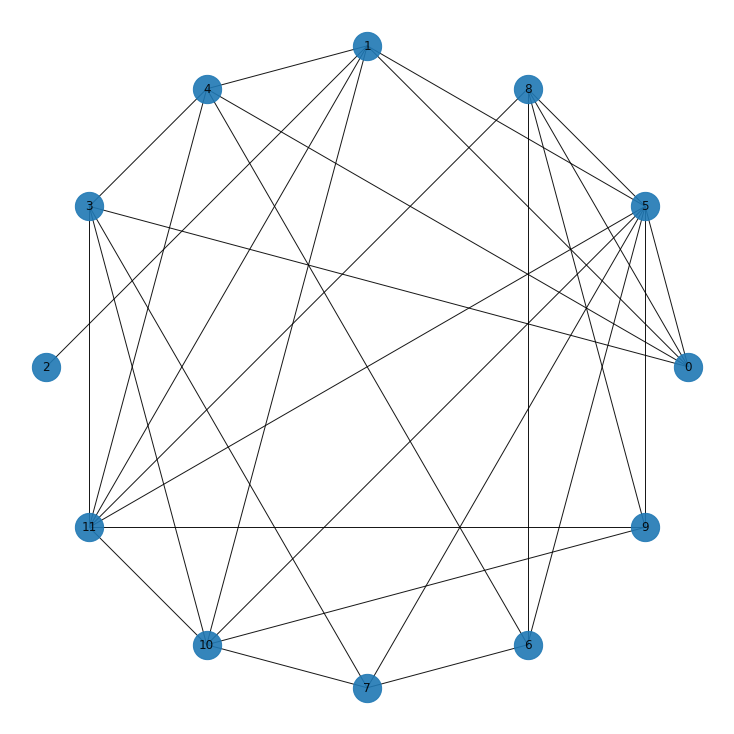

In [23]:
plt.figure(figsize=(10,10)) 
nx.draw(g, pos, with_labels=True, edge_color = 'k', **options)
plt.show()

# 2. Opisz graf w formie macierzy incydencji.

In [7]:
import pandas as pd

In [15]:
nodes_list = list(g)
edges_list = list(g.edges())
incidence_matrix = pd.DataFrame(0, index=sorted(nodes_list), columns=sorted(edges_list))

#for node in g.nodes():
#    for neighbor in list(g.neighbors(node)):
#        incidence_matrix.at[node, neighbor]= 1

for edge in list(edges_list):
    incidence_matrix.at[edge[0], edge] = 1
    incidence_matrix.at[edge[1], edge] = 1

#### Macierz incydencji

In [16]:
im_no_indices = incidence_matrix.to_string(index=False)

In [17]:
incidence_matrix

,"(0, 1)","(0, 3)","(0, 4)","(0, 5)","(0, 8)","(1, 2)","(1, 4)","(1, 10)","(1, 11)","(3, 7)",...,"(5, 10)","(5, 11)","(7, 6)","(8, 6)","(8, 9)","(8, 11)","(10, 7)","(10, 9)","(11, 9)","(11, 10)"
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


# 3. Czy ten graf jest hamiltonowski/pół-hamiltonowski? Jeśli tak to podaj ścieżkę/cykl Hamiltona.

Wierzchołek "2" w grafie G ma tylko jedną krawędź, więc graf nie ma cyklu Hamiltona, natomiast ten wierzchołek musi być początkiem lub końcem ścieżki Hamiltona.

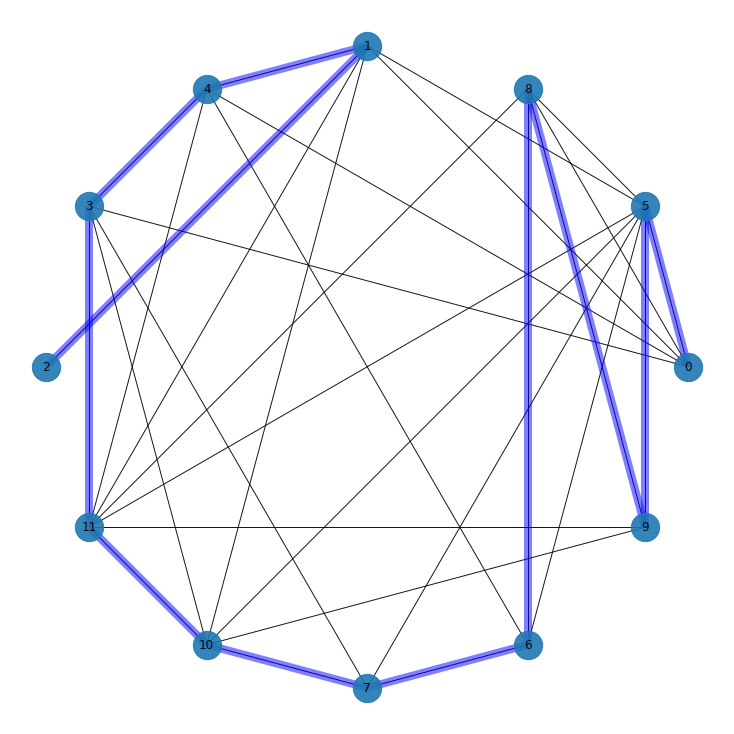

In [32]:
plt.figure(figsize=(10,10)) 
nx.draw(g, pos, with_labels=True, edge_color = 'k', **options)
nx.draw_networkx_edges(
    g,
    pos,
    edgelist=[(2, 1), (1, 4), (4, 3), (3, 11), (11, 10), (10, 7),
             (7, 6), (6, 8), (8, 9), (9, 5), (5, 0)],
    width=8,
    alpha=0.5,
    edge_color="b",
)
plt.show()

#### Ścieżka Hamiltona:

$2 \to 1 \to 4 \to 3 \to 11 \to 10 \to 7 \to 6 \to 8 \to 9 \to 5 \to 0$

# 4. Czy ten graf jest eulerowski/pół-eulerowski? Jeśli tak to podaj ścieżkę/cykl Eulera.

Graf G nie ma cyklu Eulera, ze względu na wierzchołek "2". Nie jest również pół-eulerowski, ponieważ posiada więcej niż dwa wierzchołki stopnia nieparzystego.

# 5. Pokoloruj graf wierzchołkowo oraz krawędziowo.

#### Kolorowanie wierzchołków.

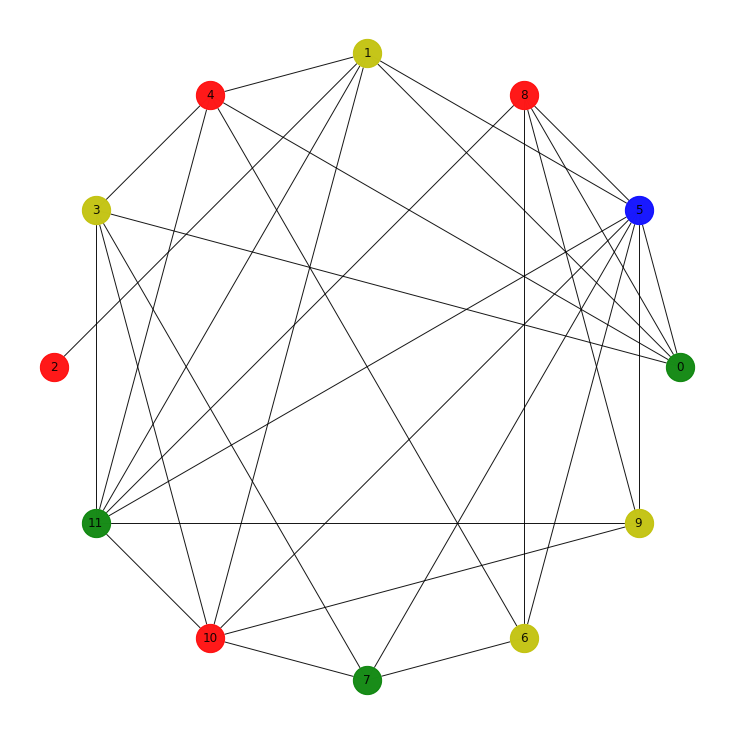

In [41]:
plt.figure(figsize=(10,10))
nx.draw(g, pos, with_labels=True, edge_color = 'k', node_color = '#FFFFFF', **options)
nx.draw_networkx_nodes(g, pos, nodelist=[1, 3, 6, 9], node_color="y", **options)
nx.draw_networkx_nodes(g, pos, nodelist=[4, 2, 8, 10], node_color="r", **options)
nx.draw_networkx_nodes(g, pos, nodelist=[11, 0, 7], node_color="g", **options)
nx.draw_networkx_nodes(g, pos, nodelist=[5], node_color="b", **options)
plt.axis("off")
plt.show()

#### Kolorowanie krawędzi.

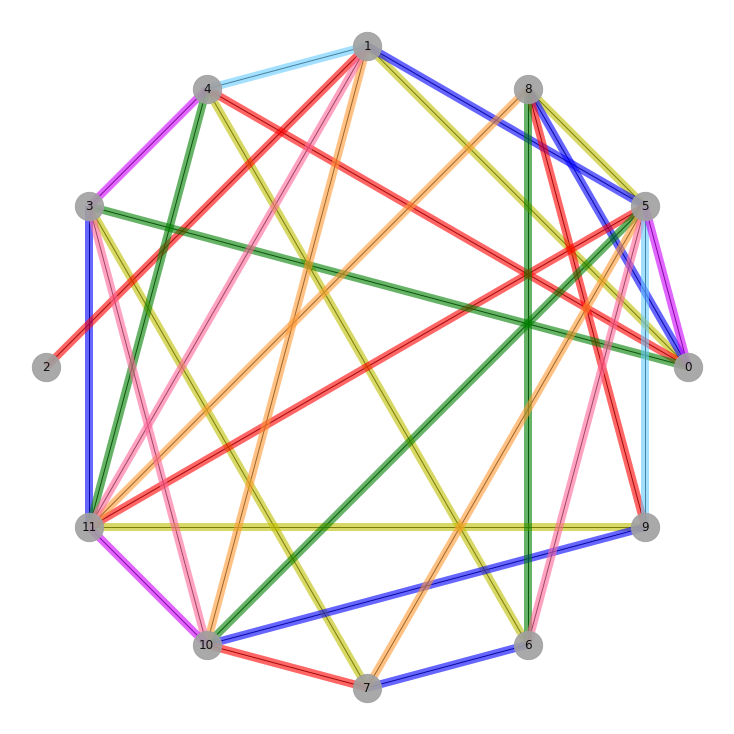

In [82]:
plt.figure(figsize=(10,10))
nx.draw(g, pos, with_labels=True, edge_color = 'k', node_color = '#A0A0A0', **options)
options_color_edge = {"width": 8, "alpha": 0.6}
# 1. Yellow
nx.draw_networkx_edges(
    g,
    pos,
    edgelist=[(5, 8), (0, 1), (9, 11), (6, 4), (7, 3)],
    edge_color="y",
    **options_color_edge
)
# 2. Blue
nx.draw_networkx_edges(
    g,
    pos,
    edgelist=[(5, 1), (8, 0), (9, 10), (6, 7), (3, 11)],
    edge_color="b",
    **options_color_edge
)
# 3. Red
nx.draw_networkx_edges(
    g,
    pos,
    edgelist=[(5, 11), (8, 9), (0, 4), (7, 10), (1, 2)],
    edge_color="r",
    **options_color_edge
)
# 4. Green
nx.draw_networkx_edges(
    g,
    pos,
    edgelist=[(5, 10), (8, 6), (0, 3), (11, 4)],
    edge_color="g",
    **options_color_edge
)
# 5. Orange
nx.draw_networkx_edges(
    g,
    pos,
    edgelist=[(5, 7), (8, 11), (10, 1)],
    edge_color="#ff9933",
    **options_color_edge
)
# 6. Pink
nx.draw_networkx_edges(
    g,
    pos,
    edgelist=[(5, 6), (10, 3), (11, 1)],
    edge_color="#ff6699",
    **options_color_edge
)
# 7. Light blue
nx.draw_networkx_edges(
    g,
    pos,
    edgelist=[(5, 9), (1, 4)],
    edge_color="#66ccff",
    **options_color_edge
)
# 8. Purple
nx.draw_networkx_edges(
    g,
    pos,
    edgelist=[(5, 0), (10, 11), (3, 4)],
    edge_color="#cc00ff",
    **options_color_edge
)
plt.axis("off")
plt.show()

Stopień wierzchołka "5" jest równy 8 (deg(5) = 8), więc musimy użyć co najmniej 8 różnych kolorów, aby pokolorować wszystkie krawędzie.

# 6. Podaj liczbę chromatyczną oraz indeks chromatyczny dla grafu.

#### Liczba chromatyczna
Jest równa 4.
#### Indeks chromatyczny
Jest równy 8.

# 7. Wyznacz minimalne drzewo rozpinające dla analizowanego grafu.

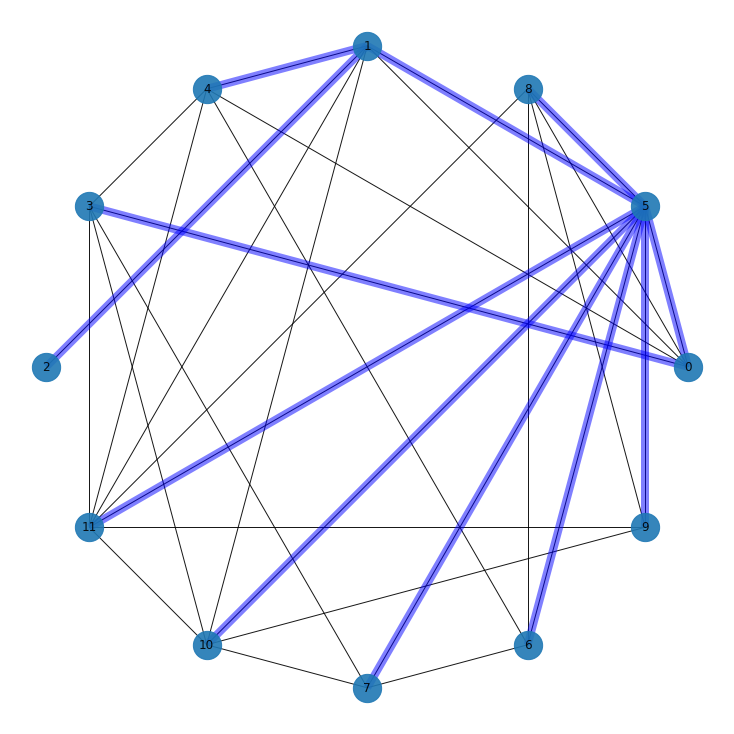

In [84]:
plt.figure(figsize=(10,10)) 
nx.draw(g, pos, with_labels=True, edge_color = 'k', **options)
nx.draw_networkx_edges(
    g,
    pos,
    edgelist=[(5, 8), (5, 1), (5, 11), (5, 10), (5, 7), (5, 6), (5, 9), (5, 0), (1, 4), (1, 2), (0, 3)],
    width=8,
    alpha=0.5,
    edge_color="b",
)
plt.show()

# 8. Czy graf jest planarny?

Aby określić czy graf jest planarny szukamy w nim grafu rozszerzonego grafu $K_{3,3}$ lub $K_{5}$

###### $K_{3,3}$
Szukamy dwóch trójek różnych wierzchołków, które tworzą graf dwudzielny bezpośrednio lub przechodząc przez dodatkowe punkty.
###### $K_{5}$
Szukamy pięciu wierzchołków, które są połączone każdy z każdym.

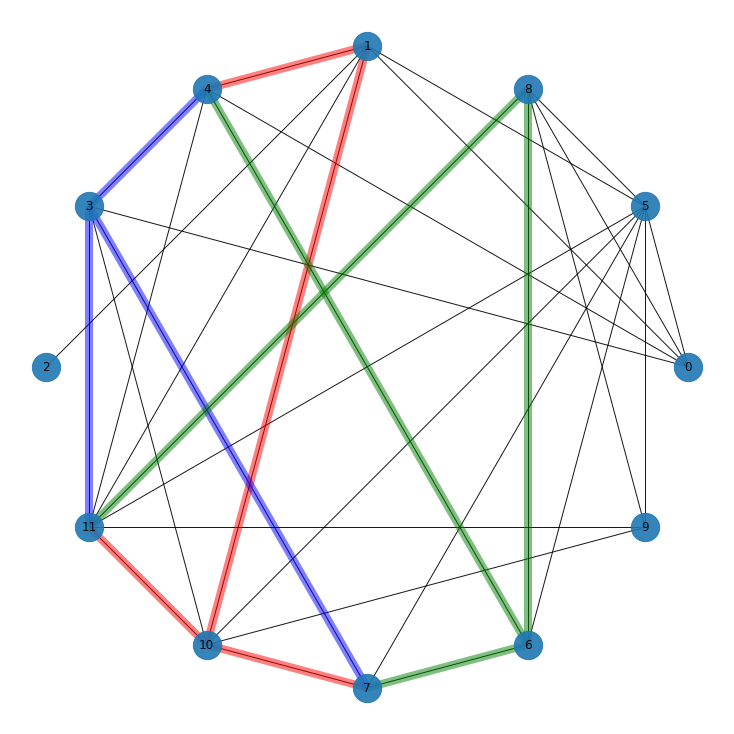

In [98]:
plt.figure(figsize=(10,10)) 
nx.draw(g, pos, with_labels=True, edge_color = 'k', **options)
nx.draw_networkx_edges(
    g,
    pos,
    edgelist=[(10, 1), (1, 4), (10, 7), (10, 11)],
    width=8,
    alpha=0.5,
    edge_color="r",
)
nx.draw_networkx_edges(
    g,
    pos,
    edgelist=[(3, 4), (3, 7), (3, 11)],
    width=8,
    alpha=0.5,
    edge_color="b",
)
nx.draw_networkx_edges(
    g,
    pos,
    edgelist=[(6, 4), (6, 7), (6, 8), (8, 11)],
    width=8,
    alpha=0.5,
    edge_color="g",
)
plt.show()

In [12]:
import networkx.algorithms.planarity as planarity

In [13]:
g_kuratowski = planarity.get_counterexample(g)

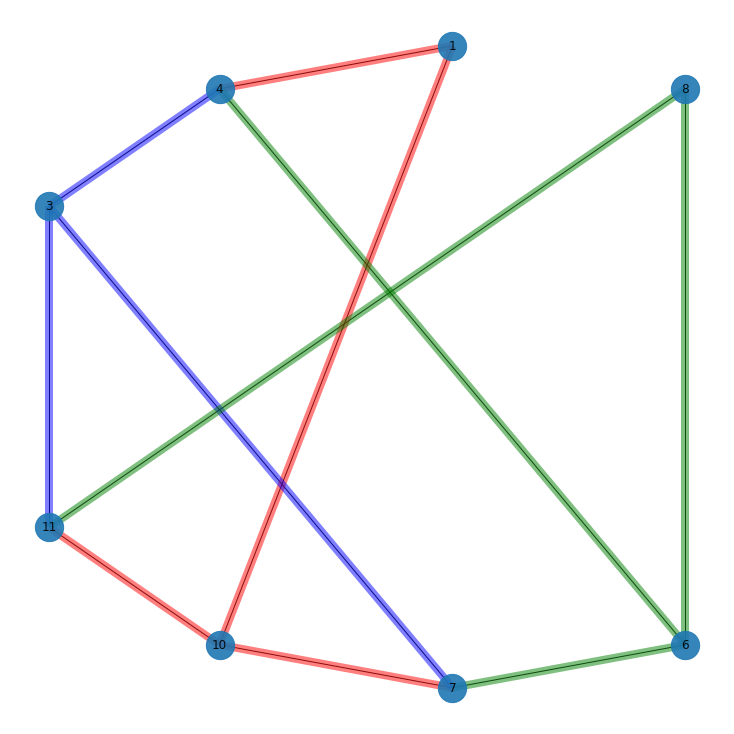

In [104]:
plt.figure(figsize=(10,10))
nx.draw(g_kuratowski, pos, with_labels=True, edge_color = 'k', **options)
nx.draw_networkx_edges(
    g_kuratowski,
    pos,
    edgelist=[(10, 1), (1, 4), (10, 7), (10, 11)],
    width=8,
    alpha=0.5,
    edge_color="r",
)
nx.draw_networkx_edges(
    g_kuratowski,
    pos,
    edgelist=[(3, 4), (3, 7), (3, 11)],
    width=8,
    alpha=0.5,
    edge_color="b",
)
nx.draw_networkx_edges(
    g_kuratowski,
    pos,
    edgelist=[(6, 4), (6, 7), (6, 8), (8, 11)],
    width=8,
    alpha=0.5,
    edge_color="g",
)
plt.show()
plt.show()

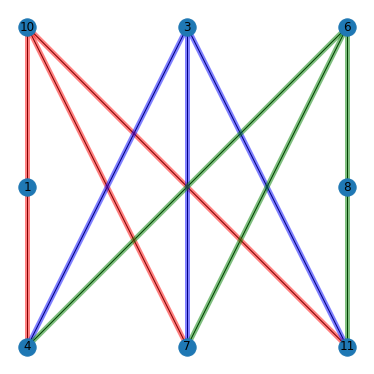

In [96]:
plt.figure(figsize=(5,5))
positions = {10:[-1,1], 3:[0,1], 6:[1,1], 4:[-1,-1], 7:[0,-1], 11:[1,-1], 1:[-1, 0], 8:[1, 0]}
nx.draw(g_kuratowski, positions, with_labels=True, edge_color = 'k')
nx.draw_networkx_edges(
    g,
    positions,
    edgelist=[(10, 1), (1, 4), (10, 7), (10, 11)],
    width=5,
    alpha=0.5,
    edge_color="r",
)
nx.draw_networkx_edges(
    g,
    positions,
    edgelist=[(3, 4), (3, 7), (3, 11)],
    width=5,
    alpha=0.5,
    edge_color="b",
)
nx.draw_networkx_edges(
    g,
    positions,
    edgelist=[(6, 4), (6, 7), (6, 8), (8, 11)],
    width=5,
    alpha=0.5,
    edge_color="g",
)
plt.show()

Graf zawiera graf rozszerzony grafu $K_{3,3}$, więc z twierdzenia Kuratowskiego graf nie jest planarny.


